<a href="https://colab.research.google.com/github/ibrahimkibrahi/CV/blob/main/Binary_Classification_of_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### [Problem 1] Select features and categories for practice

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()


In [ ]:
#store features matrix in
data = pd.DataFrame(data= np.c_[iris["data"]],
                    columns = iris["feature_names"])
print(data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [ ]:
# store target vector in
target = pd.DataFrame(data= np.c_[iris["target"]],
                      columns = ["species"])

target.head()

,species
0,0
1,0
2,0
3,0
4,0


In [ ]:
df = pd.concat([data, target], axis=1)
#hear we concatinate the data and the target using the column wise i.e axis 1
df = df.loc[df["species"].isin([1,2])]
# hear another set of column call species is been added to our data
df = df.reset_index(drop=True)
# hear we rest the data in a way in which is will look like a new data i.e it will start counting from zero
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1
4,6.5,2.8,4.6,1.5,1


In [ ]:
df1 = df.loc[:, ["sepal length (cm)", "petal length (cm)", "species"]]
# hear we also extract again usin the loc or iloc
df1.head()

,sepal length (cm),petal length (cm),species
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1


### [Problem 2] Data Analysis

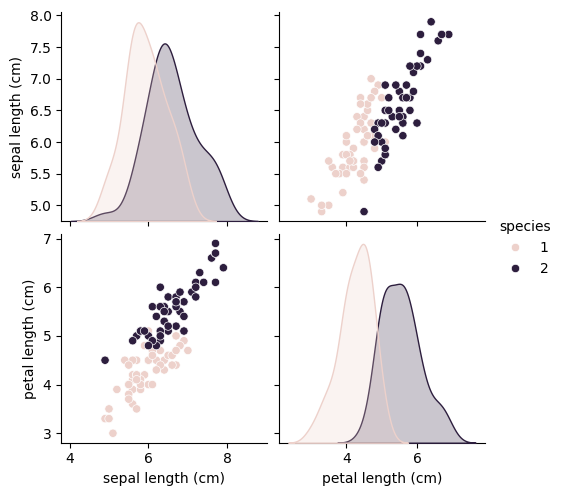

In [ ]:
sns.pairplot(df1, hue="species")

TypeError: scatterplot() got multiple values for argument 'data'

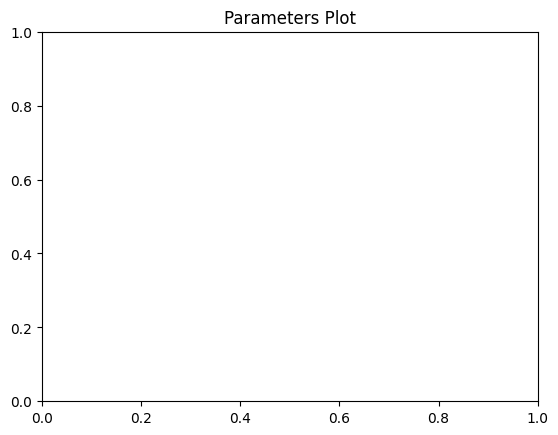

In [ ]:
plt.title("Parameters Plot")
sns.scatterplot("sepal length (cm)", "petal length (cm)", data=df1, hue="species", palette= "deep")
plt.legend(loc="upper left")
plt.show()

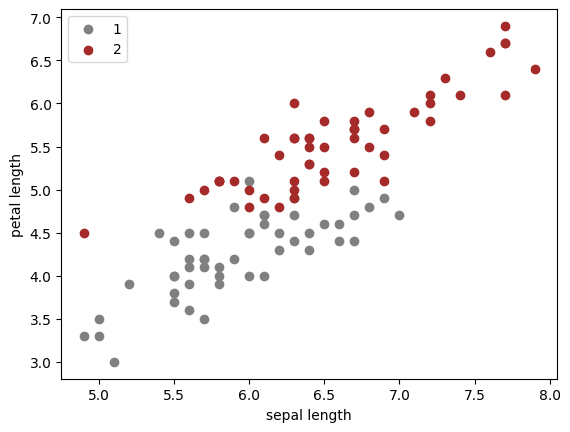

In [ ]:
# other method
colors = ["grey", "brown"]
species = [1,2]
for i in range(2):
  x = df1[df1["species"] == species[i]]
  plt.scatter(x["sepal length (cm)"], x["petal length (cm)"], c =colors[i], label = species[i])
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend()

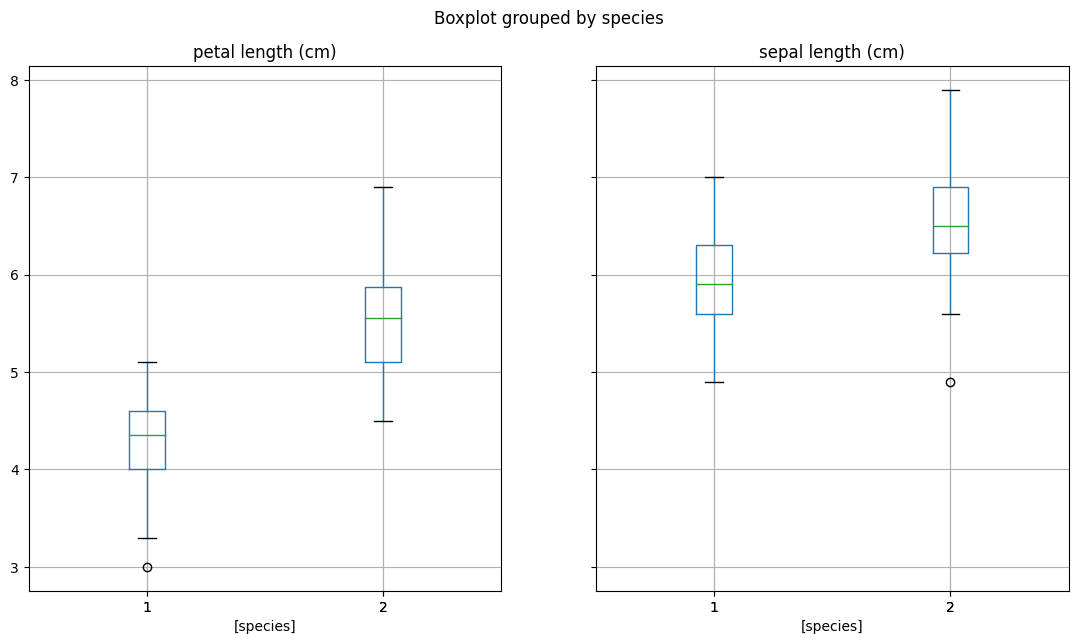

In [ ]:
df1.boxplot(by="species", figsize=(13,7))
plt.show()

<Axes: xlabel='species', ylabel='petal length (cm)'>

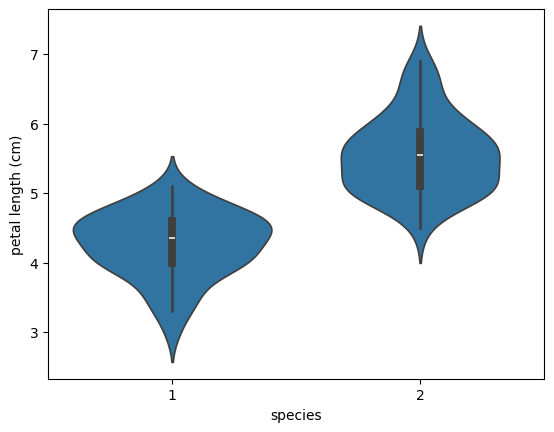

In [ ]:
sns.violinplot(x="species", y="petal length (cm)", data=df1)

<Axes: xlabel='species', ylabel='sepal length (cm)'>

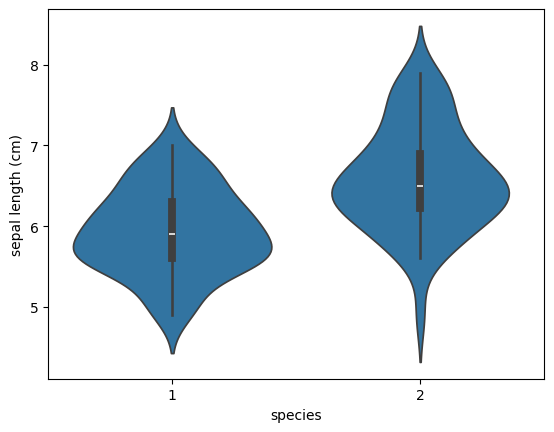

In [ ]:
sns.violinplot(x= "species", y = "sepal length (cm)", data=df1)

### [Problem 3] Division of preprocessing/ Training data and verification





##### Train Test Split

Split our data into a training set a testing set

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)


NameError: name 'X' is not defined

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.ndim

### [Problem 4] Preprocessing/Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler
scaler.fit(X_train)
X_traintransform = scaler.transform(X_train)
X_testTransform = scaler.transform(X_test)

#fit transform perform the same task insteed of use fit same time and we come again and transform

### [Problem 5] Learning and estimation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Instatiate learning model (k = 5)
classifier5 = KNeighborsClassifier(n_neighbors=5)
classifier5.fit(X_trainTrasform, y_trainTransform)
print("pred5 = ", y_pred5)

# Instantiate learning model (k = 1)
classifier1 = KNeighborsClassifier(n_neighbors=1)
classifier1.fit(X_trainTrasform, y_trainTransform)

### [Problem 6] Evaluation

In [ ]:
from sklearn.matrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

prediction = [y_pred5, y_pred1, y_pred3]
keys = ["knn5", "knn1", "knn3"]

for a, prediction in enumerate(prediction, 0):
  print("prediction of = ",  keys[a])
  print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=prediction)*100)
  print("Recall =", recall_score(y_true=y_test, y_pred=prediction, average=None))
  print("F1 score = ", f1_score(y_true=y_test, y_pred=prediction, average=None))
  print("precission score = ", precision_score(y_true=y_test, y_pred=prediction, average = None))
  print("confusion = ", confusion_matrix(y_true=y_test, y_pred=prediction))
  print("...........................................................")

### Recall
Recall is a metrix that quantifies the number of correct positive predictios made out of all positive predictions that could have been made

### Accuracy
Accuracy is the number of correctly predict data points out of all the data points. Classification accuracy is our starting point. it is the number of correct predictions made divided by the total number of predictions made, multiplied by 100 turn it into a percentage.

### Precision
Precision answer the question, out of the nuber of times a model predited positive, how often wes it correct? Precision should be used as a performance metric when the importance of False Positive is very high and the importanc of false negative is very low

### F1 score is use as a performance metric when the number of samples in the positive class is very less and if the cost of false-positive and the cost of false negative both are very high


### [Problem 7] Visualization

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
models = [classifier5, classifier1, classifier3]
for a, model in enumerate(models, 1)
  decision_region(x_testTransform, y_test, model)

###[Problem 8] Learning by other methods

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#KNN
from sklearn.neighbors import KNeigborsClassifier
neig = KNeigborsClassifier()
neig.fit(X_trainTransform, y_train)
y_predn = neig.predict(X_testTransform)


In [ ]:
# Logistic Regression

lr_classifier = LogisticRegression
lr_classifier.fit(X_trainTransform, y_train);
y_pred_lrc = lr_classifier.predict(X_testTransform)

In [ ]:
# Create a svm Classifier

clf = svm.SVC()
clf.fit(x_trainTransform, y_train)
y_pred_svm = clf.predict(X_test)

In [ ]:
# Decision Tree
dt_clf = DecisionTreeClassifier(criterioin="entropy", random_state=0)
dt_clf.fit(X_trainTransform, y_train)
y_preddt = dt_clf.predict(X_testTransform)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_traintransform, y_train)
y_predrf = rf_clf.predict(X_testTransform)

estimating, evaluating and visualization

In [ ]:
print("KNN")
print(y_predn)
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=prediction)*100)
print("Recall =", recall_score(y_true=y_test, y_pred=prediction, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=prediction, average=None))
print("precission score = ", precision_score(y_true=y_test, y_pred=y_predn, average = None))
print("confusion = ", confusion_matrix(y_true=y_test, y_pred=y_predn))
decision_region(X_testTransform, y_test, neig)
print("\n")

print("LOGISTIC REGRESSION")
print(y_pred_lrc)
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=prediction)*100)
print("Recall =", recall_score(y_true=y_test, y_pred=prediction, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=prediction, average=None))
print("precission score = ", precision_score(y_true=y_test, y_pred=y_pred_lrc, average = None))
print("confusion = ", confusion_matrix(y_true=y_test, y_pred=y_pred_lrc))
decision_region(X_testTransform, y_test, lr_classifier)
print("\n")


print("SVM")
print(y_pred_svm)
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=prediction)*100)
print("Recall =", recall_score(y_true=y_test, y_pred=prediction, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=prediction, average=None))
print("precission score = ", precision_score(y_true=y_test, y_pred=predi, average = None))
print("confusion = ", confusion_matrix(y_true=y_test, y_pred=y_pred_svm))
decision_region(X_testTransform, y_test, dt_clf)
print("\n")

print("DECISION TREE")
print(y_preddt)
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=prediction)*100)
print("Recall =", recall_score(y_true=y_test, y_pred=prediction, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=prediction, average=None))
print("precission score = ", precision_score(y_true=y_test, y_pred=y_preddt, average = None))
print("confusion = ", confusion_matrix(y_true=y_test, y_pred=y_preddt))
decision_region(X_testTransform, y_test, dt__clf)
print("\n")

print("Random Forest")
print(y_predrf)
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=prediction)*100)
print("Recall =", recall_score(y_true=y_test, y_pred=prediction, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=prediction, average=None))
print("precission score = ", precision_score(y_true=y_test, y_pred=y_predrf, average = None))
print("confusion = ", confusion_matrix(y_true=y_test, y_pred=y_predrf))
decision_region(X_testTransform, y_test, rf_clf)
print("\n")


### [Problem 9] (Advanced task) Comparison with and without standardization

In [ ]:
def comp_standard(title, prediction, model, std):
  print(title)
  print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=prediction)*100)
  print("Recall =", recall_score(y_true=y_test, y_pred=prediction, average=None))
  print("F1 score = ", f1_score(y_true=y_test, y_pred=prediction, average=None))
  print("precission score = ", precision_score(y_true=y_test, y_pred=prediction, average = None))
  print("confusion = ", confusion_matrix(y_true=y_test, y_pred=prediction))
  decision_region(X_test, y_test, model)
model = [neig, lr_classifier, clf, dt_clf, rf_clf]

In [ ]:
#KNN
from sklearn.neighbors import KNeigborsClassifier
neig = KNeigborsClassifier()
neig.fit(X_train, y_train)
y_predn = neig.predict(X_test)
comp_standard("KNN", y_predn, neig, std=False)
print("..........................................")

# Logistic Regression

lr_classifier = LogisticRegression
lr_classifier.fit(X_train, y_train);
y_pred_lrc = lr_classifier.predict(X_test)
comp_standard("LOGISTIC REGRESSION", y_pred_lrc, lr_classifier, std=False)
print("..........................................")

# Create a svm Classifier

clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)
comp_standard("SVM", y_pred_svm, clf, std=False)
print("..........................................")

# Decision Tree
dt_clf = DecisionTreeClassifier(criterioin="entropy", random_state=0)
dt_clf.fit(X_train, y_train)
y_preddt = dt_clf.predict(X_test)
comp_standard("DECISION TREE",y_preddt, dt_clf, std=False)
print("..........................................")

# Random Forest
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
y_predrf = rf_clf.predict(X_test)
comp_standard("Random Forest", y_predrf,rf_clf, std=False)
print("..........................................")


### [ Problem 10] (Advanced task) Method with high accuracy using all objective variables

In [ ]:
# New training set
x1 = np.array(data.loc[:,["sepal length (cm)", "petal length (cm)"]])
x1.shape

(150, 2)

In [ ]:
y1 = np.array(target).ravel()
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# TRAIN TEST SPLIT
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state = 42)
X1_train.shape

NameError: name 'X1' is not defined

In the binary classification of iris assignment when I try to split the train_test This is the code:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)


i received and error which say:

NameError                                 Traceback (most recent call last)
<ipython-input-15-e69f8e6f1ffe> in <cell line: 2>()
      1 # TRAIN TEST SPLIT
----> 2 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)
      3 X1_train.shape

NameError: name 'X' is not defined